<a href="https://colab.research.google.com/github/salmakhale/DL-computer-vision/blob/main/diab_class_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# Load CSV file
Data= pd.read_csv("/content/diabetes.csv")
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X= Data.drop("Outcome", axis=1)
y= Data[["Outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Day idk** **bold text**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Score: 0.7467532467532467
Confusion Matrix:
 [[78 21]
 [18 37]]


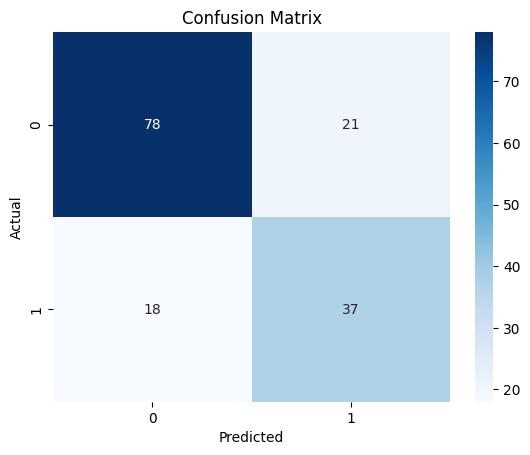

In [ ]:


model = LogisticRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

model_score = model.score(X_test, y_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

print("Model Score:", model_score)
print("Confusion Matrix:\n", confusion_matrix)

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Predict new data
new_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [148],
    'BloodPressure': [72],
    'SkinThickness': [35],
    'Insulin': [0],
    'BMI': [33.6],
    'DiabetesPedigreeFunction': [0.627],
    'Age': [50]
})

new_prediction = model.predict(new_data)
print("New Data Prediction:", new_prediction)

New Data Prediction: [1]


In [ ]:
# First test
new_data = pd.DataFrame({
    'Pregnancies': [6],
    'Glucose': [98],
    'BloodPressure': [58],
    'SkinThickness': [33],
    'Insulin': [130],
    'BMI': [34.0],
    'DiabetesPedigreeFunction': [0.430],
    'Age': [43]
})

new_prediction = model.predict(new_data)
print("New Data Prediction:", new_prediction)

New Data Prediction: [0]


In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


In [ ]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


# **Day 9**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614, 1)
(154, 8)
(154, 1)


In [ ]:
modell = Sequential()

modell.add(Dense(32, activation='relu', input_shape=(8,))) #doll layers keda 3 layer w kol layer fyh neurons masslan its 32 neurons keda w1 = 7*32+32 = 256 parameter
modell.add(Dense(16, activation='relu')) # w2 = 32*16+16 = 528
modell.add(Dense(1, activation='sigmoid')) # el input shape w el output 4abah el model, w3 = 16*1+1 = 17

In [ ]:
modell.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
modell.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

trained = modell.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/100
31/31 [==============================] - 4s 51ms/step - loss: 2.7753 - binary_accuracy: 0.5906 - val_loss: 0.6922 - val_binary_accuracy: 0.5447
Epoch 2/100
31/31 [==============================] - 1s 21ms/step - loss: 0.6690 - binary_accuracy: 0.6517 - val_loss: 0.7150 - val_binary_accuracy: 0.6016
Epoch 3/100
31/31 [==============================] - 0s 16ms/step - loss: 0.6552 - binary_accuracy: 0.6578 - val_loss: 0.7219 - val_binary_accuracy: 0.5528
Epoch 4/100
31/31 [==============================] - 1s 19ms/step - loss: 0.6540 - binary_accuracy: 0.6436 - val_loss: 0.6403 - val_binary_accuracy: 0.6341
Epoch 5/100
31/31 [==============================] - 0s 13ms/step - loss: 0.6349 - binary_accuracy: 0.6741 - val_loss: 0.6484 - val_binary_accuracy: 0.6098
Epoch 6/100
31/31 [==============================] - 0s 16ms/step - loss: 0.6191 - binary_accuracy: 0.6762 - val_loss: 0.6267 - val_binary_accuracy: 0.6260
Epoch 7/100
31/31 [==============================] - 0s 15ms/ste

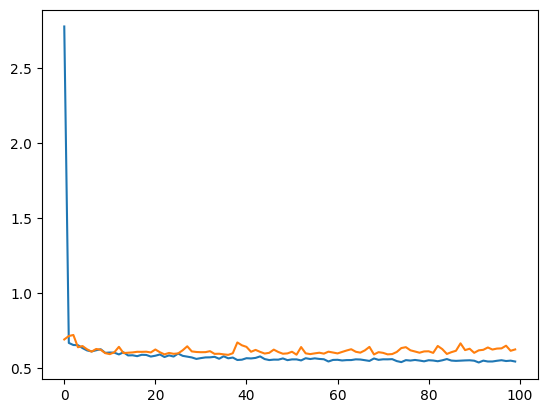

In [ ]:
plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])


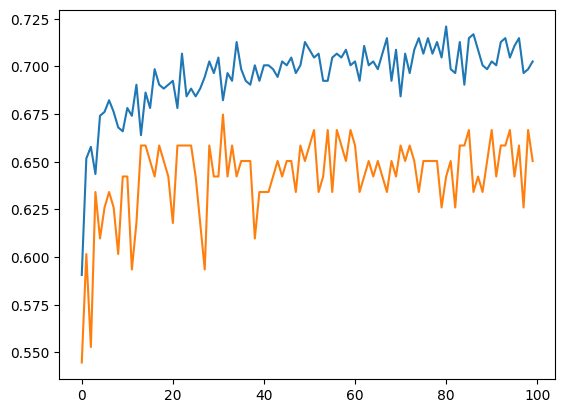

In [ ]:
plt.plot(trained.history['binary_accuracy'])
plt.plot(trained.history['val_binary_accuracy'])


In [ ]:
mms = MinMaxScaler()
X_train1 = mms.fit_transform(X_train)
X_test1 = mms.transform(X_test)


modelll = Sequential()

modelll.add(Dense(32, activation='relu', input_shape=(8,))) #doll layers keda 3 layer w kol layer fyh neurons masslan its 32 neurons keda w1 = 7*32+32 = 256 parameter
modelll.add(Dense(16, activation='relu')) # w2 = 32*16+16 = 528
modelll.add(Dense(1, activation='sigmoid')) # el input shape w el output 4abah el model, w3 = 16*1+1 = 17

modelll.compile(loss = 'binary_crossentropy', optimizer='sgd', metrics=['binary_accuracy'])

trainedd = modelll.fit(X_train1, y_train, epochs=500, batch_size=16, validation_split=0.2, verbose=1, shuffle=True)

Epoch 1/500
31/31 [==============================] - 2s 32ms/step - loss: 0.7315 - binary_accuracy: 0.3422 - val_loss: 0.6983 - val_binary_accuracy: 0.3902
Epoch 2/500
31/31 [==============================] - 0s 12ms/step - loss: 0.6938 - binary_accuracy: 0.4827 - val_loss: 0.6785 - val_binary_accuracy: 0.6911
Epoch 3/500
31/31 [==============================] - 0s 10ms/step - loss: 0.6726 - binary_accuracy: 0.7088 - val_loss: 0.6680 - val_binary_accuracy: 0.6748
Epoch 4/500
31/31 [==============================] - 1s 18ms/step - loss: 0.6601 - binary_accuracy: 0.6741 - val_loss: 0.6616 - val_binary_accuracy: 0.6098
Epoch 5/500
31/31 [==============================] - 0s 10ms/step - loss: 0.6513 - binary_accuracy: 0.6660 - val_loss: 0.6574 - val_binary_accuracy: 0.6098
Epoch 6/500
31/31 [==============================] - 1s 16ms/step - loss: 0.6449 - binary_accuracy: 0.6640 - val_loss: 0.6547 - val_binary_accuracy: 0.6098
Epoch 7/500
31/31 [==============================] - 0s 16ms/ste

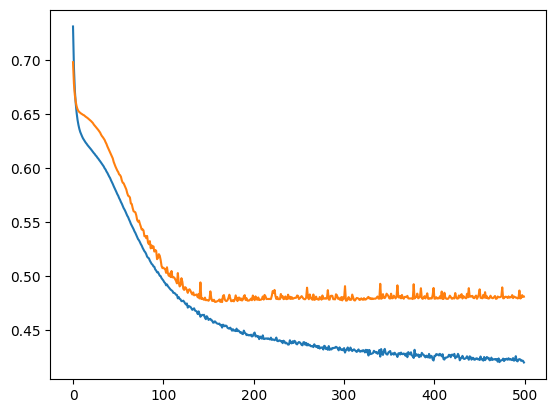

In [ ]:
plt.plot(trainedd.history['loss'])
plt.plot(trainedd.history['val_loss'])


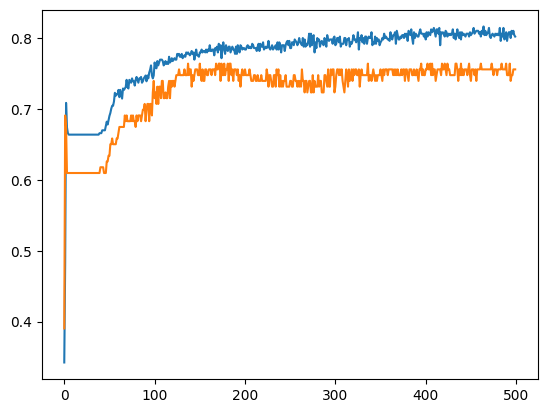

In [ ]:
plt.plot(trainedd.history['binary_accuracy'])
plt.plot(trainedd.history['val_binary_accuracy'])
